# SVM Practice with custom model estimator

Support vector machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)

In [0]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [0]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

<class 'numpy.ndarray'>


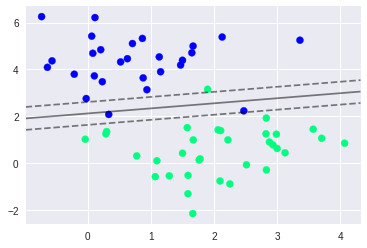

In [0]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=2, n_features=2,random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(type(X))

# clf = SVC(kernel='poly').fit(X_train, y_train)
clf = SVC(kernel='linear').fit(X_train, y_train)

# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='winter')

plot_svc_decision_function(clf, plot_support=False);


In [0]:
df = pd.DataFrame()
df['predicted'] = clf.predict(X_test).astype(int)
df['labels'] = y_test.astype(int)

df['correct'] = df['predicted'] == df['labels']

# Machine Learning metrics

### Classification Accuracy

Classification Accuracy is what we usually mean, when we use the term accuracy. 
It is the ratio of number of correct predictions to the total number of input samples.
$$Accuracy=\frac{Number\:of\:Correct\:predictions}{Total\:number\:of\:predictions\:made}$$

It works well only if there are equal number of samples belonging to each class.

In [0]:
### INPLACE HERE CODE THAT COMPUTES ACCURACY

len(df[df['correct'] == True]) / len(df['correct'])

0.95

### Confusion Matrix

Confusion Matrix as the name suggests gives us a matrix as output and describes the complete performance of the model.

Lets assume we have a binary classification problem. We have some samples belonging to two classes : YES or NO. Also, we have our own classifier which predicts a class for a given input sample. On testing our model on 165 samples ,we get the following result.
n=165  

  
|       -         |   Predicted: NO   |   Predicted: YES  |
|-----------------|-------------------|-------------------|
|   Actual  NO    |         50        |        10         |
|   Actual  YES   |         5         |       100         |

$$Confusion Matrix$$

There are 4 important terms :

* <b>True Positives</b> : The cases in which we predicted YES and the actual output was also YES.
* <b>True Negatives</b> : The cases in which we predicted NO and the actual output was NO.
* <b>False Positives</b> : The cases in which we predicted YES and the actual output was NO.
* <b>False Negatives</b> : The cases in which we predicted NO and the actual output was YES.

Accuracy for the matrix can be calculated by taking average of the values lying across the “<b>main diagonal</b>” i.e

$$Accuracy=\frac{True\:Positives+False\:Negatives}{Total\:Number\:of\:Samples}$$

Confusion Matrix forms the basis for the other types of metrics.

In [0]:
### INPLACE HERE CODE THAT SHOWS CONFUSION MATRIX
from sklearn.metrics import classification_report, confusion_matrix
import itertools
%matplotlib inline
from matplotlib import pyplot as plt
	
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
	
# Compute confusion matrix
cnf_matrix = confusion_matrix(df['labels'], df['predicted'], labels=[0,1])
np.set_printoptions(precision=2)
	
print(cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis])
	
print (classification_report(df['labels'], df['predicted']))



[[0.93 0.07]
 [0.03 0.97]]
             precision    recall  f1-score   support

          0       0.96      0.93      0.94        27
          1       0.94      0.97      0.96        33

avg / total       0.95      0.95      0.95        60



Confusion matrix, without normalization
[[25  2]
 [ 1 32]]


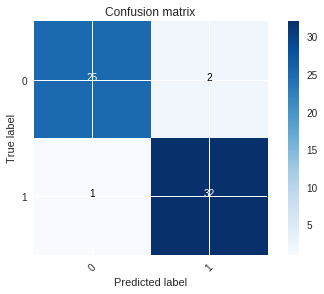

In [0]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize= False,  title='Confusion matrix')

### F1 Score

<i>F1 Score is used to measure a test’s accuracy</i>

F1 Score is the Harmonic Mean between precision and recall. The range for F1 Score is [0, 1]. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).

High precision but lower recall, gives you an extremely accurate, but it then misses a large number of instances that are difficult to classify. The greater the F1 Score, the better is the performance of our model. Mathematically, it can be expressed as :


$$F1=2\times\frac{Precision\times Recall}{Precision+Recall}$$

F1 Score tries to find the balance between precision and recall.

* <b>Precision</b> : It is the number of correct positive results divided by the number of positive results predicted by the classifier.
$$Precision=\frac{True\:Positives}{True\:Positives+False\:Positives}$$


* <b>Recall</b> : It is the number of correct positive results divided by the number of <b>all</b> relevant samples (all samples that should have been identified as positive).
$$Recall=\frac{True\:Positives}{True\:Positives+False\:Negatives}$$

In [0]:
len(df[(df['correct'] == False) & (df['labels'] != 0)])

1

In [0]:
### CLASS PRACTICAL TASK 1
### INSERT HERE COMPUTATIONS FOR: ACC RC RP F1
### Do it from scratch and using scikit-learn api


### AND YOUR BLOCK

print (classification_report(df['labels'], df['predicted']))

def find_f1(label):
  true_positives = len(df[(df['correct'] == True) & (df['labels'] == label)])
  false_negatives = len(df[(df['correct'] == False) & (df['labels'] == label)])
  false_positives = len(df[(df['correct'] == False) & (df['predicted'] == label)])
                           
  precision = true_positives / (true_positives + false_positives)
  recall = true_positives / (true_positives + false_negatives)
  f1 = 2 * ((precision*recall) / (precision + recall))
  return f1
                     

print('F1 for 0:', find_f1(0))
print('F1 for 1:', find_f1(1))

             precision    recall  f1-score   support

          0       0.96      0.93      0.94        27
          1       0.94      0.97      0.96        33

avg / total       0.95      0.95      0.95        60

Precision: 0.9259259259259259
Recall: 0.9615384615384616
F1 for 0: 0.9433962264150944
Precision: 0.9696969696969697
Recall: 0.9411764705882353
F1 for 1: 0.955223880597015


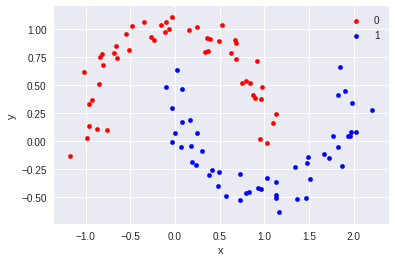

In [0]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()


In [0]:
df.head()

,label,x,y
0,0,0.849408,0.481937
1,0,-0.918143,0.446295
2,1,0.067497,0.355881
3,1,1.908657,-0.212701
4,0,-0.817086,0.350044


Model variants: 88


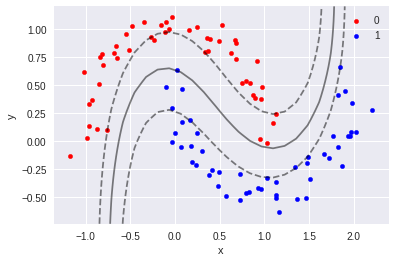

Estimate model {'kernel': 'rbf', 'gamma': 0.1, 'C': 1000}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        20



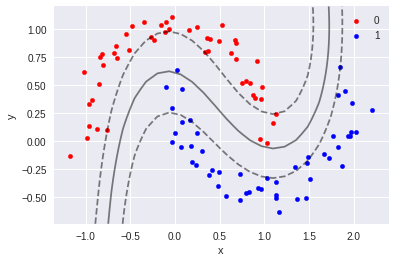

Estimate model {'kernel': 'rbf', 'gamma': 0.2, 'C': 100}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        20



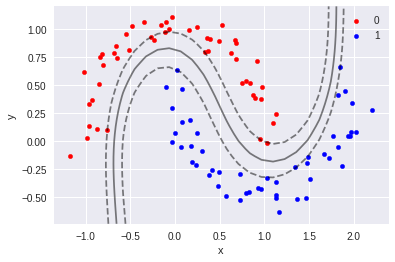

Estimate model {'kernel': 'rbf', 'gamma': 0.2, 'C': 1000}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        20



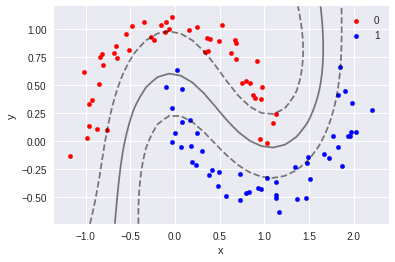

Estimate model {'kernel': 'rbf', 'gamma': 0.5, 'C': 10}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        20



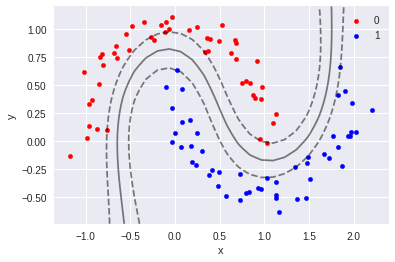

Estimate model {'kernel': 'rbf', 'gamma': 0.5, 'C': 100}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        20



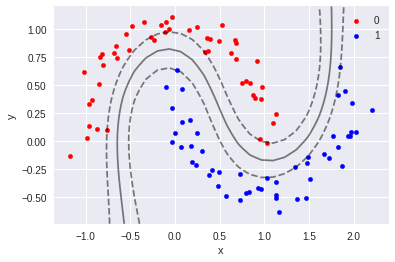

Estimate model {'kernel': 'rbf', 'gamma': 0.5, 'C': 1000}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        20

("{'kernel': 'rbf', 'gamma': 0.1, 'C': 1000}", 1.0)
("{'kernel': 'rbf', 'gamma': 0.2, 'C': 100}", 1.0)
("{'kernel': 'rbf', 'gamma': 0.2, 'C': 1000}", 1.0)
("{'kernel': 'rbf', 'gamma': 0.5, 'C': 10}", 1.0)
("{'kernel': 'rbf', 'gamma': 0.5, 'C': 100}", 1.0)
("{'kernel': 'rbf', 'gamma': 0.5, 'C': 1000}", 1.0)
("{'kernel': 'poly', 'degree': 2, 'C': 10}", 0.898989898989899)
("{'kernel': 'poly', 'degree': 4, 'C': 10}", 0.898989898989899)
("{'kernel': 'poly', 'degree': 6, 'C': 1000}", 0.898989898989899)
("{'kernel': 'poly', 'degree': 10, 'C': 1000}", 0.898989898989899)
("{'kernel': 'rbf', 'gamma': 0.0001, 'C': 1000}", 0.8496240601503761)
("{'kernel': 'rbf', 'gamma': 0.001, 'C': 100}", 0.8496240601503761)
("{'kernel': 'rbf', 

In [0]:
### CLASS PRACTICAL TASK 2
### CONSIDERING DATA PROVIDED ONE CELL ABOVE TRAIN AN SVM CLASSIFIER
### AND PROVIDE MODEL EVALUATING AND CLASSES AND DECISON BOUNDARY VISUALIZATION


### AND YOUR BLOCK
# linear rbf poly sigmoid 
# учесть разные варианты для каждого ядра
# сравнивать по f1

import itertools
from sklearn import svm
from sklearn.metrics import f1_score


def estimate_model(X, y, print_threshold=0.95):
  
  parameters = [{'kernel': ['rbf'],
                 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
                 'C': [1, 10, 100, 1000]},
                {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                {'kernel': ['poly'], 'degree': [2, 4, 6, 9, 10, 12, 14],
                 'C': [1, 10, 100, 1000]}]
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  permutations = {}
  count = 0

  for model in parameters:
    k = model['kernel'][0]
    product = []
    for p in model:
      if p != 'kernel':
        product.append([(p, item) for item in model[p]])
    permutations[k] = list(itertools.product(*product))
    count += len(permutations[k])
  
  print("Model variants:", count)
  
  svm_params = {}
  estimation = {}

  df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
  colors = {0:'red', 1:'blue'}
  grouped = df.groupby('label')

  for model in permutations:
    svm_params = {}
    svm_params['kernel'] = model
    for params in permutations[model]:
      for param in params:
        svm_params[param[0]] = param[1]
      clf = svm.SVC(**svm_params)    
      #print(clf)
      clf.fit(X_train, y_train)
      yhat = clf.predict(X_test)
      f1 = f1_score(y_test, yhat, average='weighted')
      if f1 > print_threshold:
        fig, ax = pyplot.subplots()
        for key, group in grouped:
          group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
        plot_svc_decision_function(clf, plot_support=False)  
        pyplot.show()
        print('Estimate model', svm_params)
        print(classification_report(y_test, yhat))
      estimation[str(svm_params)] = f1


  estimation = sorted(estimation.items(), key=lambda x: x[1], reverse=True) 
  return estimation


est = estimate_model(X, y)

for score in est:
  print(score)

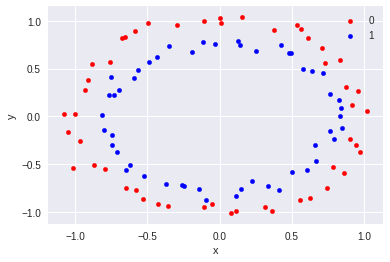

In [0]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.05)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()


In [0]:
### CLASS PRACTICAL TASK 3
### CONSIDERING DATA PROVIDED ONE CELL ABOVE TRAIN AN SVM CLASSIFIER
### AND PROVIDE MODEL EVALUATING AND CLASSES AND DECISON BOUNDARY VISUALIZATION


### AND YOUR BLOCK

Model variants: 88


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


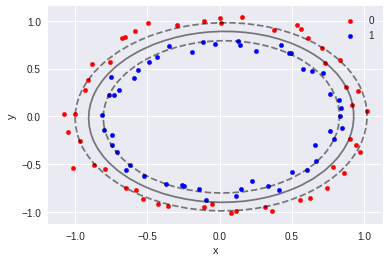

Estimate model {'kernel': 'rbf', 'gamma': 0.1, 'C': 100}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        20



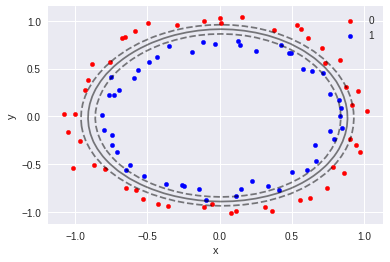

Estimate model {'kernel': 'rbf', 'gamma': 0.1, 'C': 1000}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        20



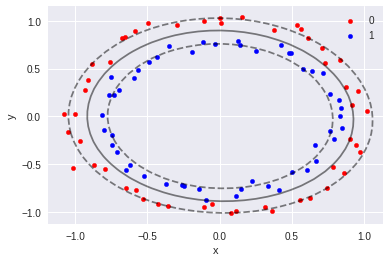

Estimate model {'kernel': 'rbf', 'gamma': 0.2, 'C': 10}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        20



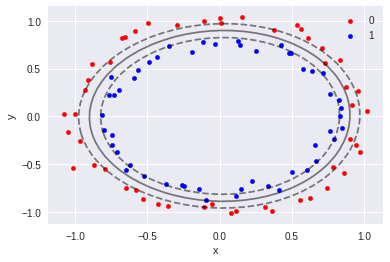

Estimate model {'kernel': 'rbf', 'gamma': 0.2, 'C': 100}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        20



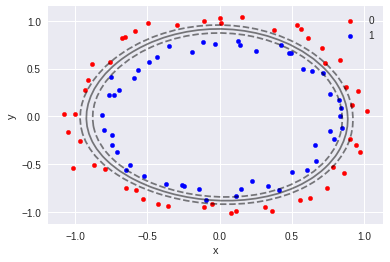

Estimate model {'kernel': 'rbf', 'gamma': 0.2, 'C': 1000}
             precision    recall  f1-score   support

          0       0.89      1.00      0.94         8
          1       1.00      0.92      0.96        12

avg / total       0.96      0.95      0.95        20



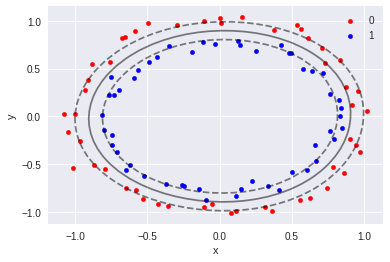

Estimate model {'kernel': 'rbf', 'gamma': 0.5, 'C': 10}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        20



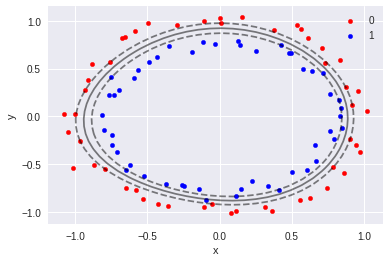

Estimate model {'kernel': 'rbf', 'gamma': 0.5, 'C': 100}
             precision    recall  f1-score   support

          0       0.89      1.00      0.94         8
          1       1.00      0.92      0.96        12

avg / total       0.96      0.95      0.95        20



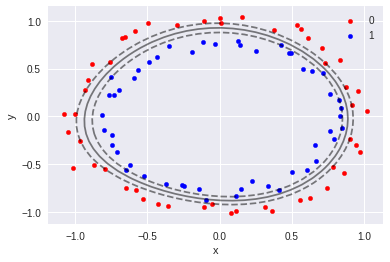

Estimate model {'kernel': 'rbf', 'gamma': 0.5, 'C': 1000}
             precision    recall  f1-score   support

          0       0.89      1.00      0.94         8
          1       1.00      0.92      0.96        12

avg / total       0.96      0.95      0.95        20



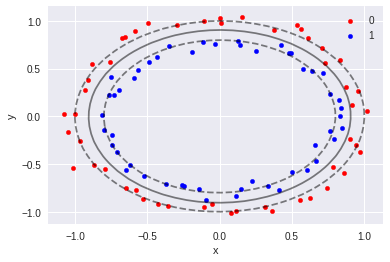

Estimate model {'kernel': 'poly', 'degree': 2, 'C': 10}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        20



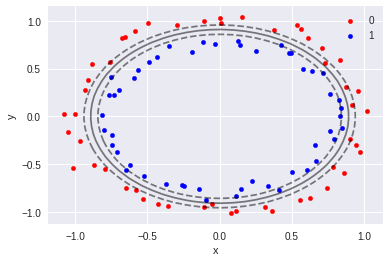

Estimate model {'kernel': 'poly', 'degree': 2, 'C': 100}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        20



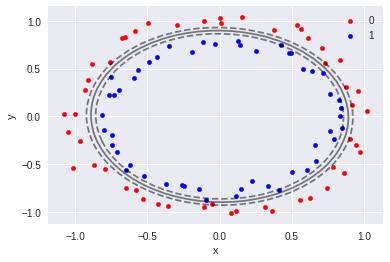

Estimate model {'kernel': 'poly', 'degree': 2, 'C': 1000}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        20



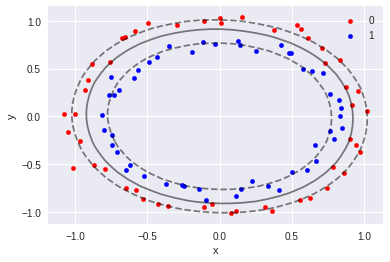

Estimate model {'kernel': 'poly', 'degree': 4, 'C': 10}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        20



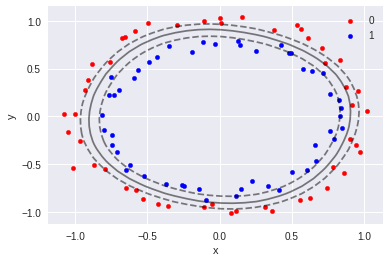

Estimate model {'kernel': 'poly', 'degree': 4, 'C': 100}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        20



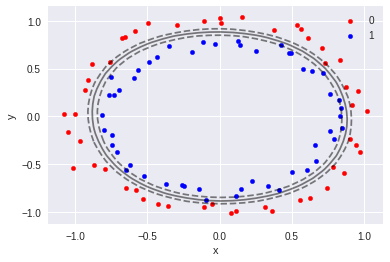

Estimate model {'kernel': 'poly', 'degree': 4, 'C': 1000}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        20



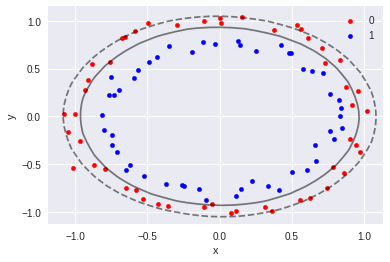

Estimate model {'kernel': 'poly', 'degree': 6, 'C': 10}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        20



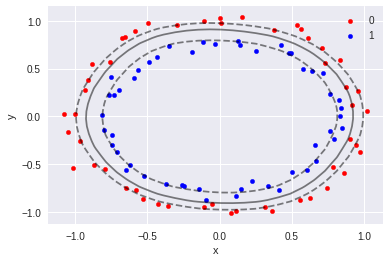

Estimate model {'kernel': 'poly', 'degree': 6, 'C': 100}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        20



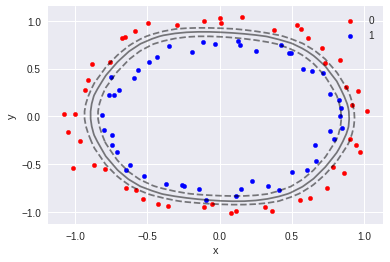

Estimate model {'kernel': 'poly', 'degree': 6, 'C': 1000}
             precision    recall  f1-score   support

          0       0.89      1.00      0.94         8
          1       1.00      0.92      0.96        12

avg / total       0.96      0.95      0.95        20



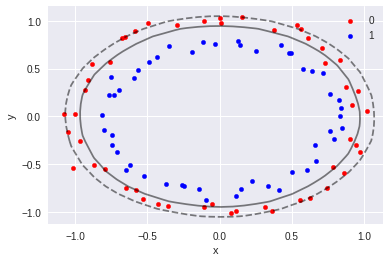

Estimate model {'kernel': 'poly', 'degree': 10, 'C': 100}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        20



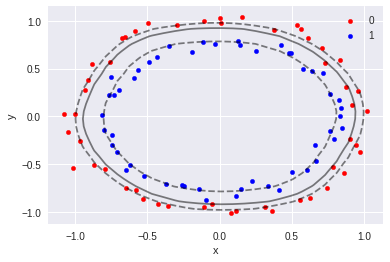

Estimate model {'kernel': 'poly', 'degree': 10, 'C': 1000}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        20



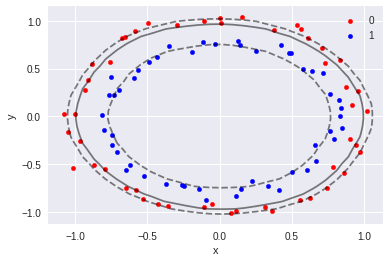

Estimate model {'kernel': 'poly', 'degree': 12, 'C': 1000}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        20



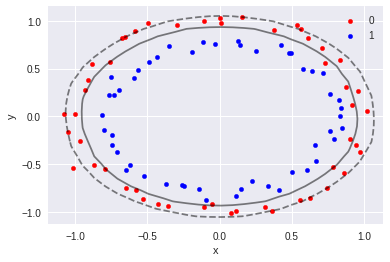

Estimate model {'kernel': 'poly', 'degree': 14, 'C': 1000}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        20

("{'kernel': 'rbf', 'gamma': 0.1, 'C': 100}", 1.0)
("{'kernel': 'rbf', 'gamma': 0.1, 'C': 1000}", 1.0)
("{'kernel': 'rbf', 'gamma': 0.2, 'C': 10}", 1.0)
("{'kernel': 'rbf', 'gamma': 0.2, 'C': 100}", 1.0)
("{'kernel': 'rbf', 'gamma': 0.5, 'C': 10}", 1.0)
("{'kernel': 'poly', 'degree': 2, 'C': 10}", 1.0)
("{'kernel': 'poly', 'degree': 2, 'C': 100}", 1.0)
("{'kernel': 'poly', 'degree': 2, 'C': 1000}", 1.0)
("{'kernel': 'poly', 'degree': 4, 'C': 10}", 1.0)
("{'kernel': 'poly', 'degree': 4, 'C': 100}", 1.0)
("{'kernel': 'poly', 'degree': 4, 'C': 1000}", 1.0)
("{'kernel': 'poly', 'degree': 6, 'C': 10}", 1.0)
("{'kernel': 'poly', 'degree': 6, 'C': 100}", 1.0)
("{'kernel': 'poly', 'degree': 10, 'C': 100}", 1.0)
("{'kernel': 

In [0]:
est = estimate_model(X, y, 0.95)

for score in est:
  print(score)